In [120]:
# 安装请先去掉以下注释并运行
# !pip3 install seaborn
# !pip3 install matplotlib
# !pip3 install pandas
# !pip3 install numpy
# !pip3 install scikit-learn
# !pip3 install seaborn
# !pip3 install statsmodels
# !pip3 install scipy
# !pip3 install numpy

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler


df = pd.read_excel("./Croq'Pain.xlsx", skiprows=2)
mscalar = MinMaxScaler()



In [62]:
# stores before 1994 (50)
stores_before_94 = df.iloc[:50]
stores_before_94 = stores_before_94.iloc[:, 1:]

# stores in 1994 (10)
stores_94 = df.iloc[51:61]
stores_94 = stores_94.iloc[:, 1:]

# stores to be opened
stores_to_open = df.iloc[62:72]
stores_to_open = stores_to_open.iloc[:, 1:]

# stores already opened (60)
stores_opened = pd.concat([stores_before_94, stores_94])


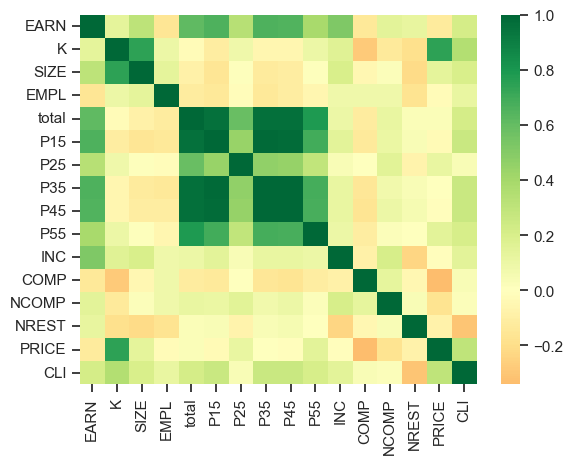

In [85]:
stores_before_94 = stores_before_94.astype(float)
corr = stores_before_94.corr('spearman', numeric_only=True)
p = sns.heatmap(corr, center=0, cmap='RdYlGn')
# stores_before_94["EARN"].astype(float)


In [92]:
def move_column_to_end(df:pd.DataFrame, column_name:str) -> pd.DataFrame:
    columns = list(df.columns) 
    columns.remove(column_name)
    columns.append(column_name)
    return df[columns]


stores_before_94 = move_column_to_end(stores_before_94, 'EARN')
stores_94 = move_column_to_end(stores_94, 'EARN')
stores_to_open = move_column_to_end(stores_to_open, 'EARN')
stores_opened = move_column_to_end(stores_opened, 'EARN')


In [112]:
import statsmodels.api as sm

def ols_regressor(X, y):
    return sm.OLS(endog=y.astype(float), exog=X.astype(float)).fit()

def backward_elimination(X, y, sig_level=0.05):
    while(True):
        regressor = ols_regressor(X, y)
        ind = np.argmax(regressor.pvalues[1:])
        maxPvalue = regressor.pvalues[ind+1]
        if maxPvalue > sig_level:
            column = X.columns[ind+1]
            # print("delete column", column, "with pvalue", maxPvalue)
            X = X.drop(column, axis=1)
            
        else:
            print(regressor.summary())
            return X

In [113]:
# 第一题，按60家店来训练

y = stores_opened['EARN'].astype(float).round(2)
X = stores_opened.iloc[:, :-1]
X = X.round(2)
X.describe() 
# X[X.columns] = mscalar.fit_transform(X[X.columns])
X_train = sm.add_constant(X)
X_train = backward_elimination(X_train, y, 0.05)

regressor = ols_regressor(X_train, y)
regressor.summary()


                            OLS Regression Results                            
Dep. Variable:                   EARN   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     65.76
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.67e-21
Time:                        23:27:55   Log-Likelihood:                -291.01
No. Observations:                  59   AIC:                             594.0
Df Residuals:                      53   BIC:                             606.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -367.6707     46.545     -7.899      0.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   EARN   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     65.76
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.67e-21
Time:                        23:27:55   Log-Likelihood:                -291.01
No. Observations:                  59   AIC:                             594.0
Df Residuals:                      53   BIC:                             606.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -367.6707     46.545     -7.899      0.000    -461.029    -274.312
K             -0.1158      0.030     -3.858      0.000      -0.176      -0.056
SIZE           1.2134      0.147      8.235      0.000       0.918       1.509
P15            0.0429      0.004     10.612      0.000       0.035       0.051
INC            9.3462      1.473      6.344      0.000       6.391      12.301
NREST          1.4398      0.207      6.960      0.000       1.025       1.855
==============================================================================
Omnibus:                        2.026   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.363   Jarque-Bera (JB):                1.482
Skew:                          -0.175   Prob(JB):                        0.477
Kurtosis:                       2.307   Cond. No.                     3.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
# 第2题，按50家店来训练

y = stores_before_94['EARN']
X = stores_before_94.iloc[:, :-1]
X_train = sm.add_constant(X)

# use backward elimination to remove the columns with pvalue > 0.05
X_train = backward_elimination(X_train, y, 0.05)

regressor = ols_regressor(X_train, y)

regressor.params

                            OLS Regression Results                            
Dep. Variable:                   EARN   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     59.89
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.61e-18
Time:                        23:30:41   Log-Likelihood:                -242.82
No. Observations:                  50   AIC:                             497.6
Df Residuals:                      44   BIC:                             509.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -392.5661     46.153     -8.506      0.0

const   -392.566066
K         -0.096014
SIZE       0.986563
P15        0.042350
INC       10.404102
NREST      1.463325
dtype: float64

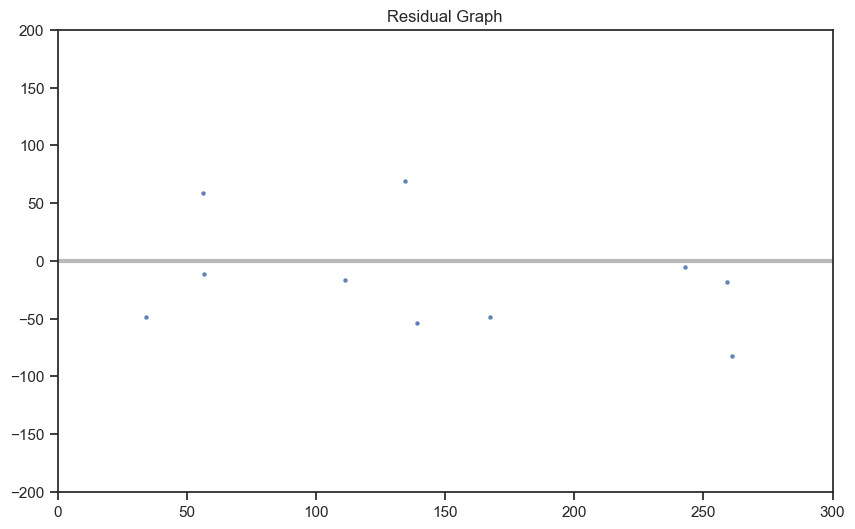

In [119]:

y = stores_94['EARN']
X = stores_94.iloc[:, :-1]
X = sm.add_constant(X)

X_test = X[regressor.params.index]

y_test = regressor.predict(X_test)

sns.set(style="ticks")
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_test-y, s=5, c='b', alpha=0.8)
plt.plot([0, 300], [0,0], '-k', linewidth=3, alpha=0.3)
p = plt.xlim(0, 300)
p = plt.ylim(-200, 200)
p = plt.title('Residual Graph')

